In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import spicy
import matplotlib as plt

In [31]:
data_shows = pd.read_csv('./data/Animated_Tv_Series.csv', encoding= 'latin1')
df_shows = pd.DataFrame(data_shows)

In [32]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1816 non-null   int64  
 1   Title             1816 non-null   object 
 2   Episodes          1798 non-null   float64
 3   Year              1816 non-null   object 
 4   Original channel  1809 non-null   object 
 5   American company  1771 non-null   object 
 6   Note              488 non-null    object 
 7   Technique         1816 non-null   object 
 8   IMDb              1812 non-null   float64
 9   Google users      1812 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 142.0+ KB


In [33]:
df_shows.drop(columns= ['Note'], inplace= True) # me cargo la columna de notas que no me sirve para nada

In [34]:
def replacing(cadena): # creo funcion para armonizar la columna de año
    return cadena.replace(',', '-')

In [35]:
# creo funciones para aplicar a año y generar columnas de inicion y de fin
def adjudicar_fin(cadena):
    cadena_lista = cadena.split('-')
    if len(cadena_lista) == 1:
        return np.nan
    elif cadena_lista[1].strip() != 'present':
        return pd.to_datetime(cadena_lista[1].strip()).year
    elif cadena_lista[1].strip() == 'present':
        return np.nan

def adjudicar_inicio(cadena):
    año_lista = cadena.split('-')
    año = año_lista[0].strip()
    
    return pd.to_datetime(año).year

In [36]:
df_shows['Year'] = df_shows['Year'].apply(replacing) # armonizo la columna de año

In [37]:
# creo una columna de inicio de la serie y fin de la misma

df_shows['Año_Inicio'] = df_shows['Year'].apply(adjudicar_inicio)
df_shows['Año_Fin'] = df_shows['Year'].apply(adjudicar_fin)

In [38]:
df_shows['Emitiendo'] = df_shows['Año_Fin'].apply(lambda x: False if pd.notna(x) else True)

In [39]:
df_shows['Episodes'].fillna(df_shows['Episodes'].median(), inplace= True)


C:\Users\franc\AppData\Local\Temp\ipykernel_9400\3813834516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shows['Episodes'].fillna(df_shows['Episodes'].median(), inplace= True)


In [40]:
df_shows['Google users'] = (df_shows['Google users'].str.replace('%', '')).astype(float) # elimino los % de la valoracion de los usuarios de google y lo convierto en float


In [41]:
df_shows.describe()

,Id,Episodes,IMDb,Google users,Año_Inicio,Año_Fin
count,1816.000000,1816.000000,1812.000000,1812.000000,1816.000000,1193.000000
mean,908.500000,45.174559,6.712031,79.499448,2000.799559,2001.089690
std,524.378362,119.504122,1.228804,15.064173,17.486918,17.409628
min,1.000000,1.000000,1.500000,9.000000,1949.000000,1950.000000
25%,454.750000,13.000000,6.200000,71.750000,1990.000000,1991.000000
50%,908.500000,26.000000,6.900000,84.000000,2004.000000,2004.000000
75%,1362.250000,52.000000,7.500000,91.000000,2016.000000,2016.000000
max,1816.000000,4633.000000,9.300000,100.000000,2024.000000,2024.000000


In [42]:
# relleno nulos en google users y imdb, voy a utilizar la media, no parece distar mucho de la mediana y son pocos nulos

df_shows['Google users'].fillna(df_shows['Google users'].mean(), inplace= True)
df_shows['IMDb'].fillna(df_shows['IMDb'].mean(), inplace= True)

C:\Users\franc\AppData\Local\Temp\ipykernel_9400\152622159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shows['Google users'].fillna(df_shows['Google users'].mean(), inplace= True)
C:\Users\franc\AppData\Local\Temp\ipykernel_9400\152622159.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [43]:
# El canal original lo voy a rellenar con la moda puesto que son pocos nulos

# el american company no voy a rellenarlo porque son una cantidad mayor, estoy pensando en eliminar los nulos...

df_shows['Original channel'].fillna(df_shows['Original channel'].mode()[0], inplace= True)
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1816 non-null   int64  
 1   Title             1816 non-null   object 
 2   Episodes          1816 non-null   float64
 3   Year              1816 non-null   object 
 4   Original channel  1816 non-null   object 
 5   American company  1771 non-null   object 
 6   Technique         1816 non-null   object 
 7   IMDb              1816 non-null   float64
 8   Google users      1816 non-null   float64
 9   Año_Inicio        1816 non-null   int64  
 10  Año_Fin           1193 non-null   float64
 11  Emitiendo         1816 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 158.0+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_9400\2471804293.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shows['Original channel'].fillna(df_shows['Original channel'].mode()[0], inplace= True)


In [44]:
df_shows.drop(columns= ['Year'], inplace= True) # esta columna ya me sobra
df_shows.head()

,Id,Title,Episodes,Original channel,American company,Technique,IMDb,Google users,Año_Inicio,Año_Fin,Emitiendo
0,1,2 Stupid Dogs,26.0,TBS,Hanna-Barbera,Traditional,7.2,91.0,1993,1995.0,False
1,2,3-2-1 Penguins!,27.0,Direct to video,Big Idea Productions,CGI,6.5,91.0,2000,2008.0,False
2,3,3-South,13.0,MTV,Warner Bros. AnimationMTV Animation,Traditional,8.0,87.0,2002,2003.0,False
3,4,3Below: Tales of Arcadia,28.0,Netflix,DreamWorks Animation Television,CGI,7.6,77.0,2018,2019.0,False
4,5,3rd & Bird,51.0,Playhouse Disney,Little Airplane Productions,Flash,7.8,92.0,2008,2010.0,False


## Analisis univariante

Original channel
Syndication                          206
Netflix                              143
ABC                                  132
CBS                                  123
Cartoon Network                      116
                                    ... 
WCBS-TV                                1
Rooster TeethHBO Max                   1
Spike TV                               1
VRVAmazon Prime Video                  1
Cartoon NetworkDC UniverseHBO Max      1
Name: count, Length: 226, dtype: int64
mean    8.035398
50%     1.000000
Name: count, dtype: float64


) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


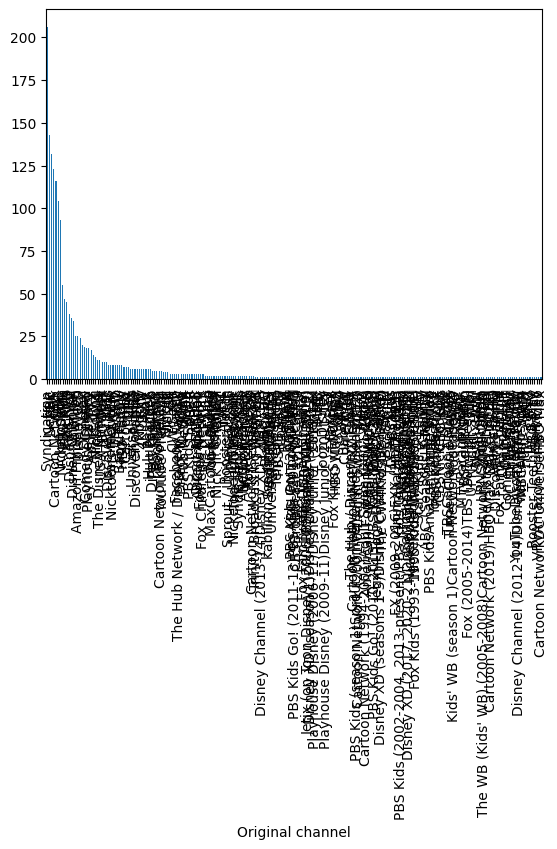

American company
Hanna-Barbera                                     189
DIC Entertainment                                  71
Warner Bros. Animation                             61
Nickelodeon Animation Studio                       57
Cartoon Network Studios                            54
                                                 ... 
Tom Synder Productions                              1
Nickelodeon Animation StudioAmerican Greetings      1
PocketWatch, Inc.                                   1
Crunchyroll Studios                                 1
The Hatchery                                        1
Name: count, Length: 505, dtype: int64
mean    3.506931
50%     1.000000
Name: count, dtype: float64


) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


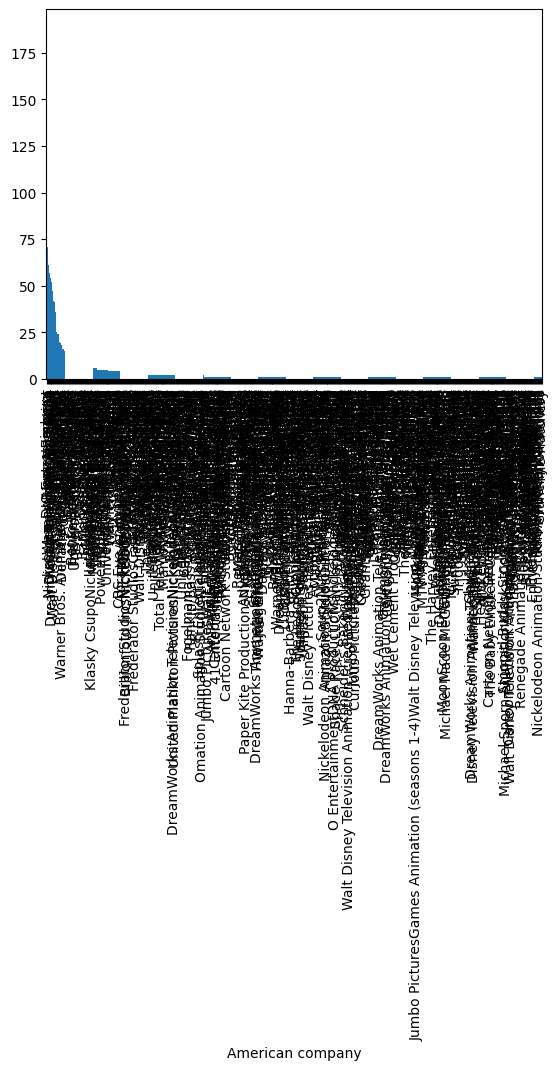

Technique
Traditional                                                                                                                                                                                           1055
Flash                                                                                                                                                                                                  356
CGI                                                                                                                                                                                                    277
Stop-Motion                                                                                                                                                                                             31
Traditional/Live-Action                                                                                                                                                           

) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


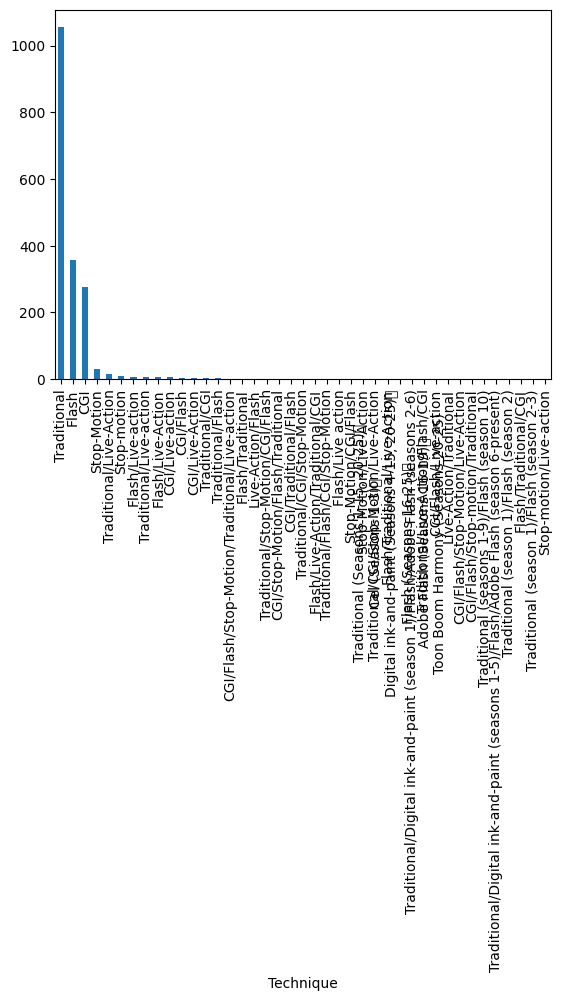

Emitiendo
False    1193
True      623
Name: count, dtype: int64
mean    908.0
50%     908.0
Name: count, dtype: float64


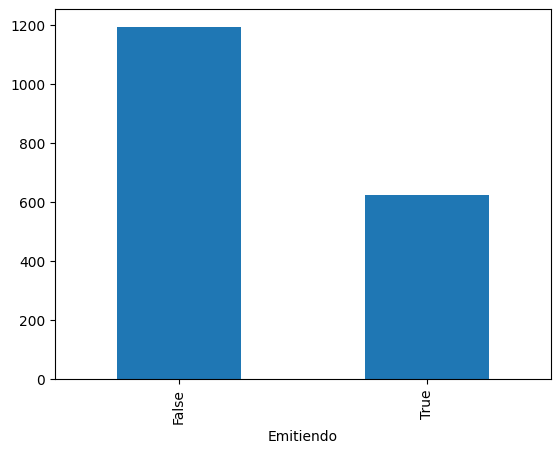

In [45]:
categoricas_shows = ['Original channel', 'American company', 'Technique', 'Emitiendo']

for i in categoricas_shows:
    plt.pyplot.clf()
    conteo = df_shows[i].value_counts()
    conteo.nunique()
    print(conteo)
    print(conteo.describe()[['mean', '50%']])
    conteo.plot(kind= 'bar')
    plt.pyplot.show()

## Numericas

Episodes


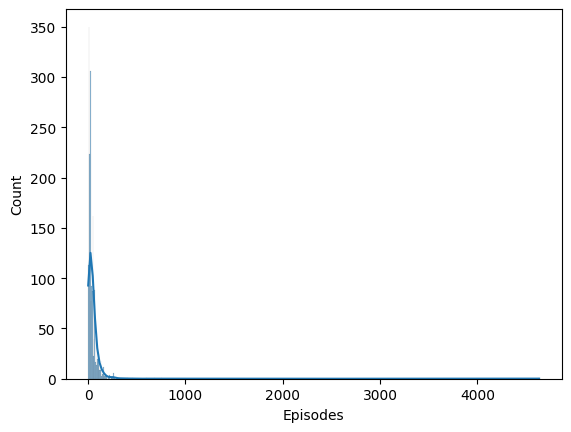

IMDb


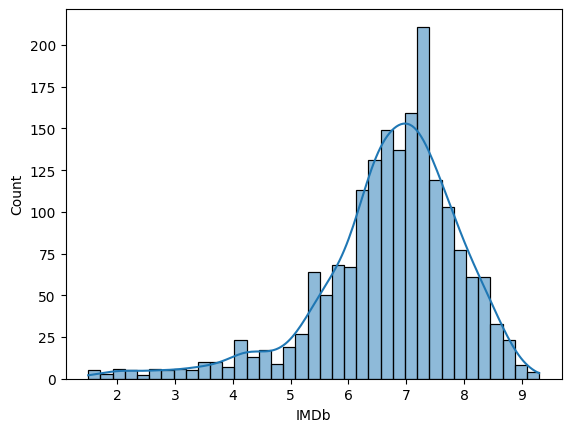

Google users


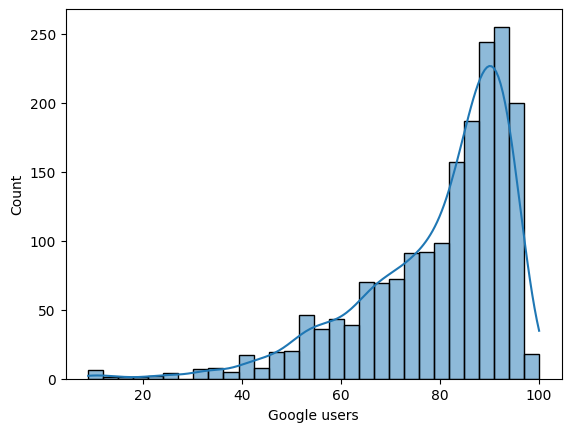

In [46]:
numericas_shows = ['Episodes', 'IMDb', 'Google users'] # ahora mismo no voy a estudiar los años

for i in numericas_shows:
    plt.pyplot.clf()
    print(i)
    sns.histplot(data= df_shows, x= i, kde= True)
    plt.pyplot.show()

Episodes


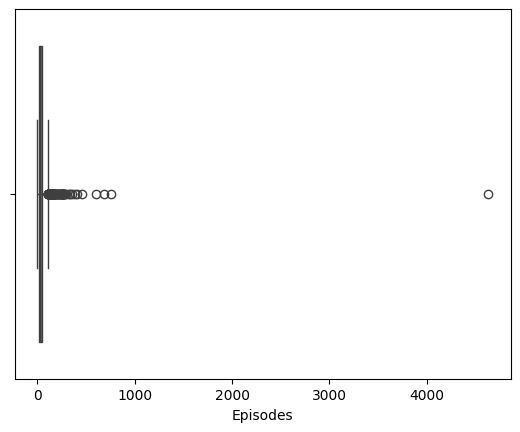

IMDb


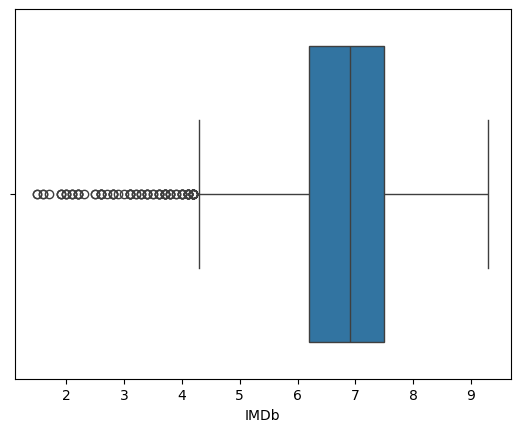

Google users


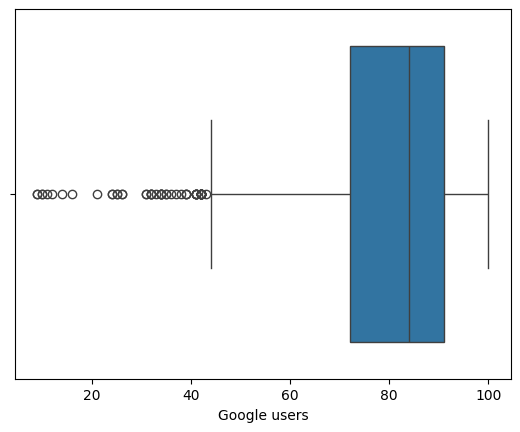

In [47]:
for i in numericas_shows:
    plt.pyplot.clf()
    sns.boxplot(data= df_shows, x = i)
    print(i)
    plt.pyplot.show()

In [49]:
# voy a ver el programa con mas episodios que me ha surgido la curiosidad

df_shows.loc[df_shows['Episodes'] == df_shows['Episodes'].max()]


,Id,Title,Episodes,Original channel,American company,Technique,IMDb,Google users,Año_Inicio,Año_Fin,Emitiendo
1445,1446,Sesame Street,4633.0,PBSPBS KidsHBO,Sesame Workshop,CGI/Flash/Stop-Motion/Traditional/Live-action,8.1,78.0,1969,NaN,True


In [56]:
# voy a eliminar los outliers de episodios
mean = df_shows['Episodes'].mean()
std_dev = df_shows['Episodes'].std()
threshold = 1
lower_threshold = mean - threshold * std_dev
upper_threshold = mean + threshold * std_dev

filtered_df = df_shows[(df_shows['Episodes'] >= lower_threshold) & (df_shows['Episodes'] <= upper_threshold)]

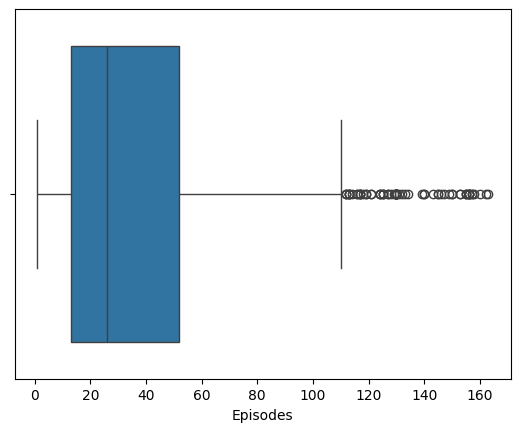

In [57]:
# vamos a ver la plotbox de la serie sin outliers

sns.boxplot(data= filtered_df, x= 'Episodes')
plt.pyplot.show()

In [59]:
# añado esta nueva serie con menos outliers al df original para estudiar

df_shows['Episodes_oo'] = filtered_df['Episodes']
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1816 non-null   int64  
 1   Title             1816 non-null   object 
 2   Episodes          1816 non-null   float64
 3   Original channel  1816 non-null   object 
 4   American company  1771 non-null   object 
 5   Technique         1816 non-null   object 
 6   IMDb              1816 non-null   float64
 7   Google users      1816 non-null   float64
 8   Año_Inicio        1816 non-null   int64  
 9   Año_Fin           1193 non-null   float64
 10  Emitiendo         1816 non-null   bool   
 11  Episodes_oo       1771 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 158.0+ KB


## Analisis bivariante

### Categoricas vs Numericas

In [74]:
median_by_google = df_shows.groupby(['Original channel'])['Google users'].median().reset_index() #calculamos las medianas por canal acorde a google
median_by_imdv = df_shows.groupby(['Original channel'])['IMDb'].median().reset_index() #calculamos las medianas por canal acorde a IMDb

) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


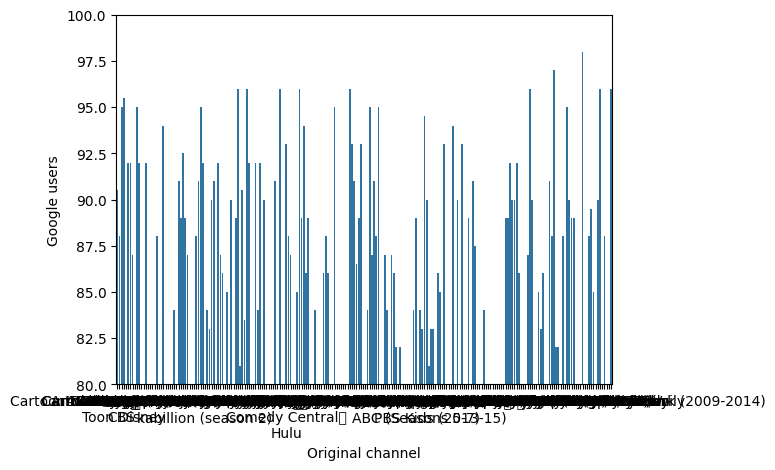

In [78]:
plt.pyplot.figure()
sns.barplot(data= median_by_google, x= 'Original channel', y= 'Google users')
plt.pyplot.ylim(80, 100)
plt.pyplot.show()

) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


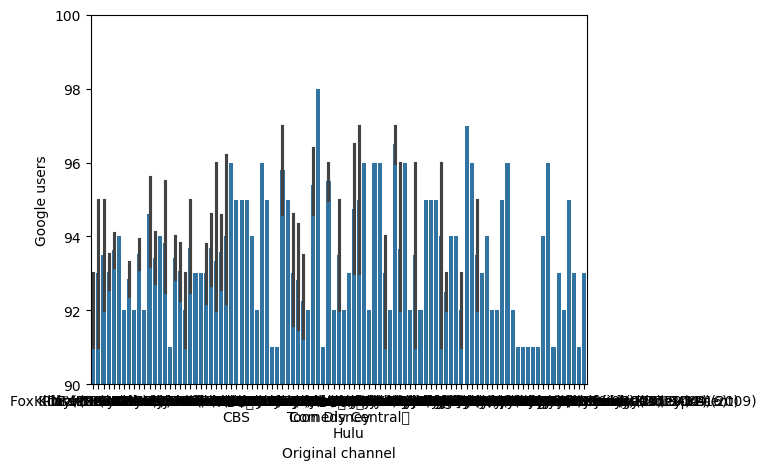

In [92]:
# voy a estudiar solo las que tienen mas de un 90 porque hay muchisimas

df_notas_altas_google = df_shows[df_shows['Google users'] > 90]

plt.pyplot.figure()
sns.barplot(data= df_notas_altas_google, x= 'Original channel', y= 'Google users')
plt.pyplot.ylim(90, 100)
plt.pyplot.show()

# esto no sigue ninguna distribucion, aqui creo que esta ponniendo todas las series y habra canales repetidos, por eso este sin dios
# vamos a hacer un histograma que agrupe a ver qu encontramos

) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


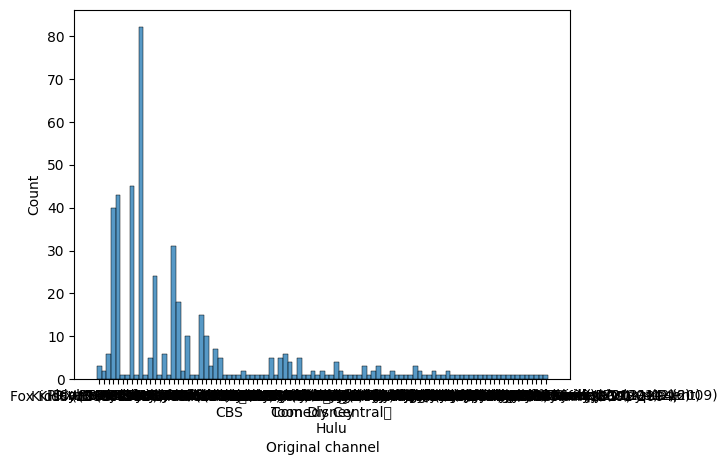

In [99]:
plt.pyplot.figure()
sns.histplot(data= df_notas_altas_google, x= 'Original channel')
plt.pyplot.show()

# esto si parece mejor. hago hist para la cantidad de series de mas de 90 en google para los canales, si apreciamos canales que sobresalen

In [106]:
df_notas_altas_google['Original channel'].value_counts(normalize= True)

Original channel
Syndication                                         0.173362
CBS                                                 0.095137
Cartoon Network                                     0.090909
ABC                                                 0.084567
NBC                                                 0.065539
                                                      ...   
Discovery Familia                                   0.002114
Cartoon Network (2019)HBO Max (2020-2022)           0.002114
Fox Kids (1993-1995)Kids' WB (1995-1998)            0.002114
ABCSyndication                                      0.002114
Jetix (on Toon Disney) (2006-09)Disney XD (2009)    0.002114
Name: proportion, Length: 97, dtype: float64

In [114]:
# voy a estudiar las que tienen mas de un 9 en IMBd

df_notas_altas_imdb = df_shows[df_shows['IMDb'] > 8]

) missing from current font.ng\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


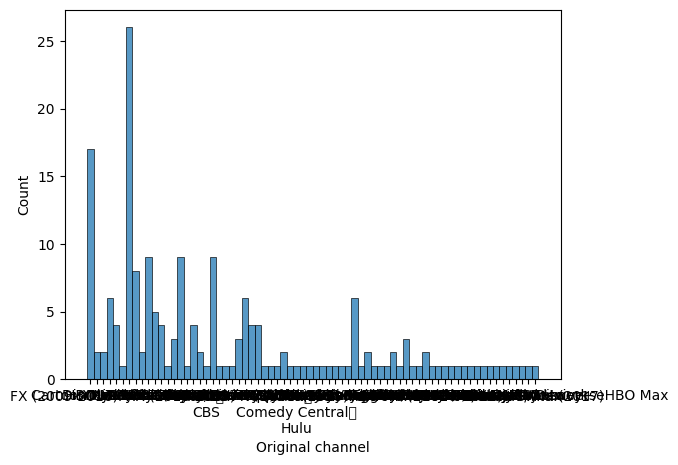

In [115]:
plt.pyplot.figure()
sns.histplot(data= df_notas_altas_imdb, x= 'Original channel')
plt.pyplot.show()

# aqui tambien hay un par de canales que sobresalen

In [117]:
df_notas_altas_imdb['Original channel'].value_counts(normalize= True)

Original channel
Netflix                                      0.136842
Cartoon Network                              0.089474
PBS Kids                                     0.047368
Adult Swim                                   0.047368
Syndication                                  0.047368
                                               ...   
Discovery Familia                            0.005263
Cartoon Network (2019)HBO Max (2020-2022)    0.005263
The History Channel                          0.005263
Fox Family                                   0.005263
Cartoon NetworkDC UniverseHBO Max            0.005263
Name: proportion, Length: 70, dtype: float64

In [124]:
df_shows.describe()[['Google users', 'IMDb']].reset_index()

,index,Google users,IMDb
0,count,1816.000000,1816.000000
1,mean,79.499448,6.712031
2,std,15.047565,1.227450
3,min,9.000000,1.500000
4,25%,72.000000,6.200000
5,50%,84.000000,6.900000
6,75%,91.000000,7.500000
7,max,100.000000,9.300000


In [127]:
df_shows[df_shows['Title'] == 'Rick and Morty'] # curiosidad personal, me gusta la serie

,Id,Title,Episodes,Original channel,American company,Technique,IMDb,Google users,Año_Inicio,Año_Fin,Emitiendo,Episodes_oo
1284,1285,Rick and Morty,61.0,Adult Swim,Williams Street,Flash,9.1,95.0,2013,NaN,True,61.0


habra relacion entre notas altas y que la serie siga emitiendo?

In [131]:
df_shows_altos = df_shows[(df_shows['Google users'] >= 90) & (df_shows['IMDb'] >= 8)]

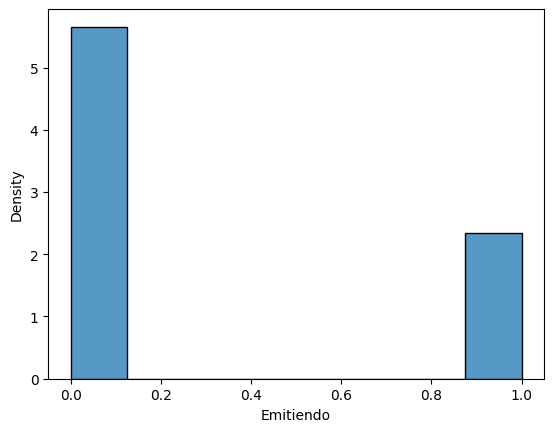

In [136]:
plt.pyplot.figure()
sns.histplot(data= df_shows_altos, x= 'Emitiendo', stat= 'density')
plt.pyplot.show()

In [138]:
df_shows_altos['Emitiendo'].value_counts(normalize= True)

# la gran mayoria de las series mejor valoradas no estan emitiendo en la actualidad

Emitiendo
False    0.706897
True     0.293103
Name: proportion, dtype: float64

In [139]:
df_shows['Nota'] = (df_shows['Google users'] + (df_shows['IMDb']*10)) / 2

In [140]:
df_shows.head()

,Id,Title,Episodes,Original channel,American company,Technique,IMDb,Google users,Año_Inicio,Año_Fin,Emitiendo,Episodes_oo,Nota
0,1,2 Stupid Dogs,26.0,TBS,Hanna-Barbera,Traditional,7.2,91.0,1993,1995.0,False,26.0,81.5
1,2,3-2-1 Penguins!,27.0,Direct to video,Big Idea Productions,CGI,6.5,91.0,2000,2008.0,False,27.0,78.0
2,3,3-South,13.0,MTV,Warner Bros. AnimationMTV Animation,Traditional,8.0,87.0,2002,2003.0,False,13.0,83.5
3,4,3Below: Tales of Arcadia,28.0,Netflix,DreamWorks Animation Television,CGI,7.6,77.0,2018,2019.0,False,28.0,76.5
4,5,3rd & Bird,51.0,Playhouse Disney,Little Airplane Productions,Flash,7.8,92.0,2008,2010.0,False,51.0,85.0


In [144]:
def plot_grouped_histograms(df, cat_col, num_col, group_size, bins = "auto"):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.pyplot.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), bins = bins)
        
        plt.pyplot.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.pyplot.xlabel(num_col)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.legend()
        plt.pyplot.show()

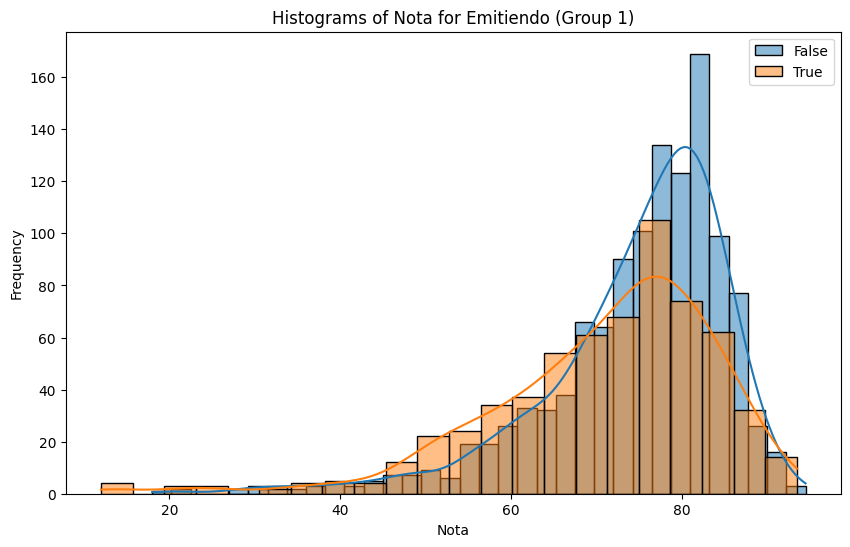

In [145]:
plot_grouped_histograms(df_shows, 'Emitiendo', 'Nota', group_size= 2)

In [146]:
grupo_a = df_shows.loc[df_shows.Emitiendo == True]["Nota"]
grupo_b = df_shows.loc[df_shows.Emitiendo == False]["Nota"]


u_stat, p_valor = spicy.stats.mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

# valor p inferior a 0.05, rechazamos la hipotesis nula y concluimos que si hay relacion entre la valoracion del publico y que siga en emision

Estadístico U: 303749.5
Valor p: 1.5674828356093444e-10


In [11]:
128+64+32+16

240